In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms

In [10]:
df_oscars = pd.read_csv('../datasets/filmes_total.csv',sep=',',decimal='.')

In [11]:
df_oscars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2220 entries, 0 to 2219
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year_ceremony          2220 non-null   int64  
 1   category               2220 non-null   object 
 2   name                   2220 non-null   object 
 3   film                   2220 non-null   object 
 4   winner                 2220 non-null   bool   
 5   Movie Name             2220 non-null   object 
 6   Year of Release        2220 non-null   int64  
 7   Gross                  1903 non-null   float64
 8   Genre                  2220 non-null   object 
 9   Stars                  2220 non-null   object 
 10  media_idade            2217 non-null   float64
 11  qtd_atores             2220 non-null   float64
 12  qtd_atores_etnia       2220 non-null   float64
 13  qtd_atores_genero      2220 non-null   float64
 14  qtd_mulheres           2220 non-null   float64
 15  qtd_

<Axes: xlabel='Gross', ylabel='year_ceremony'>

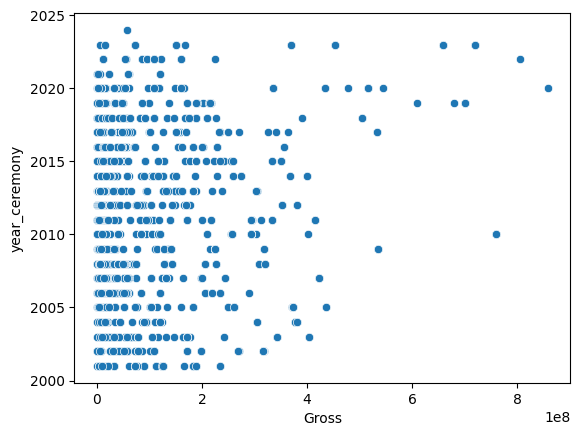

In [12]:
sns.scatterplot(df_oscars, x='Gross', y='year_ceremony')

<Axes: xlabel='year_ceremony', ylabel='Gross'>

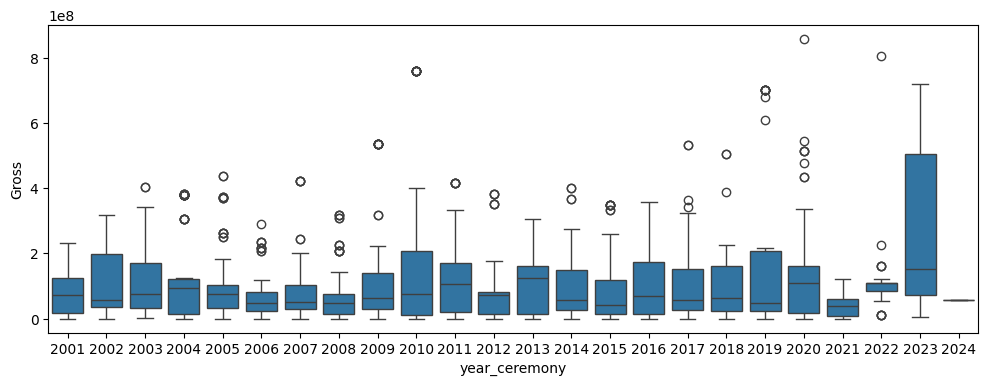

In [15]:
plt.figure(figsize=([12,4]))
sns.boxplot(df_oscars, x='year_ceremony', y='Gross')

### Outliers

In [23]:
mean_gross = df_oscars['Gross'].mean()
std_gross = df_oscars['Gross'].std()

df_oscars['Z_score'] = (df_oscars['Gross'] - mean_gross) / std_gross
outliers_zscore = df_oscars[(df_oscars['Z_score'] < -3) | (df_oscars['Z_score'] > 3)].drop_duplicates('Movie Name').sort_values(by='Gross',ascending=False)

outliers_zscore

year_ceremony                    category  \
1880           2020              visual effects   
2078           2022              visual effects   
804            2010               art direction   
2132           2023                film editing   
1722           2019              costume design   
1782           2019              visual effects   
2153           2023                best picture   
1711           2019       animated feature film   
1882           2020              visual effects   
695            2009  actor in a supporting role   
1585           2017                sound mixing   
1853           2020        music original score   
1625           2018              costume design   

                                                   name  \
1880  dan deleeuw, russell earl, matt aitken and dan...   
2078  kelly port, chris waegner, scott edelstein and...   
804   production design rick carter and robert strom...   
2132                                     eddie hamilton   
1722                                        ruth carter   
1782  dan deleeuw, kelly port, russell earl and dan ...   
2153            james cameron and jon landau, producers   
1711  brad bird, john walker and nicole paradis grindle   
1882  robert legato, adam valdez, andrew r jones and...   
695                                        heath ledger   
1585  david parker, christopher scarabosio and stuar...   
1853                                      john williams   
1625                                  jacqueline durran   

                                 film  winner  \
1880                 avengers endgame   False   
2078            spiderman no way home   False   
804                            avatar    True   
2132                 top gun maverick   False   
1722                    black panther    True   
1782            avengers infinity war   False   
2153          avatar the way of water   False   
1711                    incredibles 2   False   
1882                    the lion king   False   
695                   the dark knight    True   
1585      rogue one a star wars story   False   
1853  star wars the rise of skywalker   False   
1625             beauty and the beast   False   

                           Movie Name  Year of Release        Gross  \
1880                 avengers endgame             2019  858370000.0   
2078            spiderman no way home             2021  804750000.0   
804                            avatar             2009  760510000.0   
2132                 top gun maverick             2022  718730000.0   
1722                    black panther             2018  700060000.0   
1782            avengers infinity war             2018  678820000.0   
2153          avatar the way of water             2022  659680000.0   
1711                    incredibles 2             2018  608580000.0   
1882                    the lion king             2019  543640000.0   
695                   the dark knight             2008  534860000.0   
1585      rogue one a star wars story             2016  532180000.0   
1853  star wars the rise of skywalker             2019  515200000.0   
1625             beauty and the beast             2017  504010000.0   

                               Genre  \
1880      action,  adventure,  drama   
2078    action,  adventure,  fantasy   
804     action,  adventure,  fantasy   
2132                  action,  drama   
1722      action,  adventure,  scifi   
1782      action,  adventure,  scifi   
2153    action,  adventure,  fantasy   
1711  animation,  action,  adventure   
1882      adventure,  drama,  family   
695           action,  crime,  drama   
1585      action,  adventure,  scifi   
1853    action,  adventure,  fantasy   
1625    adventure,  family,  fantasy   

                                                  Stars  media_idade  \
1880  robert downey jr, chris evans, mark ruffalo, c...        48.75   
2078  tom holland, zendaya, benedict cumberbatch, ja...        43.25   
804  